In [1]:
%matplotlib inline
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Load and Read Datasets

In [2]:
# Files loaded

city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

In [3]:
# City and Ride Data read

city = pd.read_csv(city_data_to_load)
ride = pd.read_csv(ride_data_to_load)

In [4]:
# Above datasets combined into a single dataset

data = pd.merge(ride, city, how = "left", on = ["city","city"])

In [5]:
# Datatable displayed for preview

data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


### Data clean-up by city type

In [6]:
#City Type
urban =    data[data["type"] == "Urban"]
suburban = data[data["type"] == "Suburban"]
rural =    data [data["type"] == "Rural"]

In [7]:
#Avg Fare by city
urban_avgfare = urban.groupby(["city"]).mean()["fare"]
suburban_avgfare = suburban.groupby(["city"]).mean()["fare"]
rural_avgfare = rural.groupby(["city"]).mean()["fare"]

In [8]:
#Rides Per City

urban_rides =    urban.groupby(["city"]).count()["ride_id"]
suburban_rides = suburban.groupby(["city"]).count()["ride_id"]
rural_rides =    rural.groupby(["city"]).count()["ride_id"]

In [9]:
#Driver Count Per City 

urban_drivercount = urban.groupby(["city"]).mean()["driver_count"]
suburban_drivercount = suburban.groupby(["city"]).mean()["driver_count"]
rural_drivercount = rural.groupby(["city"]).mean()["driver_count"]

# Bubble Plot of Ride Sharing Data

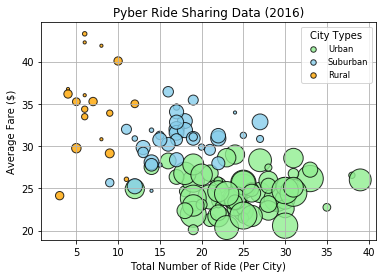

In [10]:
# Scatter plot: Total Number of Rides vs Average Fares by City Type

plt.scatter(urban_rides, urban_avgfare, edgecolor = "black", 
            marker = "o", c = "lightgreen", linewidths = 1, alpha = .8,
           s = 10 * urban_drivercount, label = "Urban")

plt.scatter(suburban_rides, suburban_avgfare, edgecolor = "black", 
            marker = "o", c = "skyblue", linewidths = 1, alpha = .8,
           s = 10 * suburban_drivercount, label = "Suburban")

plt.scatter(rural_rides, rural_avgfare, edgecolor = "black", 
            marker = "o", c = "orange", linewidths = 1, alpha = .8,
           s = 10 * rural_drivercount, label = "Rural")

# Graph Properties - Labels

plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Ride (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid(True)

# Graph Properties - Legend

legend = plt.legend(title = "City Types", fontsize = "small")

legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]
legend. legendHandles[2]._sizes = [30]


plt.show()

## Total Fares by City Type

In [11]:
# Analysis on % Total Fares by City Type

fare_by_citytype = data.groupby("type").sum()["fare"]/data.sum()["fare"]

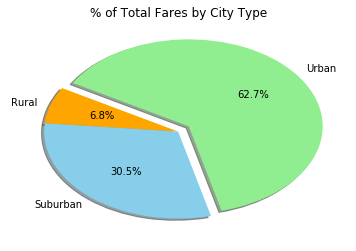

In [12]:
#Pie Chart

plt.pie(fare_by_citytype,
       labels = ["Rural", "Suburban", "Urban"],
       colors = ["orange", "skyblue", "lightgreen"],
       explode = [0, 0, .1],
       autopct = "%1.1f%%",
       shadow = True,
       startangle = 150)

plt.title("% of Total Fares by City Type")

plt.show()

## Total Rides by City Type

In [13]:
# Analysis on % of Total Rides by City Type

rides_by_citytype = data.groupby("type").count()["driver_count"] / data.count()["driver_count"]

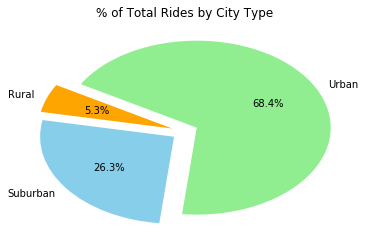

In [14]:
# Pie Chart

plt.pie(rides_by_citytype,
       labels = ["Rural","Suburban","Urban"],
       colors = ["orange", "skyblue", "lightgreen"],
       autopct = "%1.1f%%",
       explode = [.1,.1,.1],
       startangle = 150 )

plt.title ("% of Total Rides by City Type")

plt.show()

## Total Drivers by City Type

In [15]:
# Analysis on % of Total Drivers by City Type

drivers_by_citytype = city.groupby("type").sum()["driver_count"] / city.sum()["driver_count"]

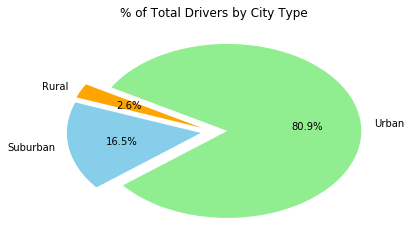

In [16]:
# Pie Chart

plt.pie(drivers_by_citytype,
       labels = ["Rural", "Suburban", "Urban"],
       colors = ["orange", "skyblue", "lightgreen"],
       autopct = "%1.1f%%",
       explode = [.1,.1,.1],
       startangle = 150)

plt.title("% of Total Drivers by City Type")


plt.show()